In [5]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [6]:
import os
import numpy as np
from sklearn.decomposition import PCA

from modules.preprocessing import compute_integral, make_cube, get_pos_lattice
from modules.preprocessing import atom_list

In [7]:
# First compute integral values
compute_integral()

# Now generate cubes
cube_list = []

# generate cubes from train
for i in range(2400):
    if i % 100 == 0:
        print(i, '/', 2400)
    filename = "data/train/{}/geometry.xyz".format(i+1)
    cube = make_cube(filename)
    
    cube_list.append(cube)

# generate cubes from test
for i in range(600):
    if i % 100 == 0:
        print(i, '/', 600)    
    filename = "data/test/{}/geometry.xyz".format(i+1)
    cube = make_cube(filename)
    
    cube_list.append(cube)
    
# save cube
cube = np.array(cube_list)
np.save("data/cube.npy", cube)

# perform PCA, and keep only 100 principal components for SVR
cube_vec = np.reshape(cube, (3000, -1))
pca = PCA(n_components=100)
pca.fit(cube_vec)

cube_PCA = np.linalg.lstsq(pca.components_.transpose()[:,:100], (cube_vec-pca.mean_).transpose())
np.save('data/cube_PCA.npy', cube_PCA[0])

0 / 2400
100 / 2400
200 / 2400
300 / 2400
400 / 2400
500 / 2400
600 / 2400
700 / 2400
800 / 2400
900 / 2400
1000 / 2400
1100 / 2400
1200 / 2400
1300 / 2400
1400 / 2400
1500 / 2400
1600 / 2400
1700 / 2400
1800 / 2400
1900 / 2400
2000 / 2400
2100 / 2400
2200 / 2400
2300 / 2400
0 / 600
100 / 600
200 / 600
300 / 600
400 / 600
500 / 600


/Users/macbookpro/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


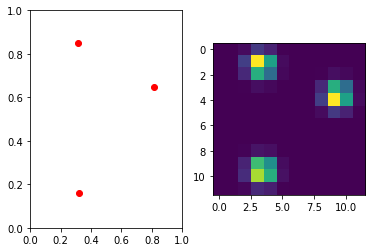

In [30]:
## Visualize to check that everything is working

# get pos_lattice for random train sample 
isample = np.random.randint(2400)
filename = "data/train/{}/geometry.xyz".format(isample+1)
pos_lattice = get_pos_lattice(filename)

subplot(1, 2, 1)
color = ['r', 'b', 'g', 'k']
for iatom, atom in enumerate([atom_list[0]]):  # only check 1st atom
    pos_list = pos_lattice[atom]
    for pos in pos_list:
        plot(pos[0], pos[1], 'o'+color[iatom])  # project on x, y (equivalent to summing on z)
xlim([0,1])
ylim([0,1])

subplot(1, 2, 2)
cube = np.load("data/cube.npy")
imshow( cube[isample, :, :, :, 0].sum(2).transpose()[::-1, :]  )  # only check 1st atom (sum on z and correct image orientation)